In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime, date, time, timedelta
import calendar

****PREGUNTA 1****

In [3]:
doc=pd.read_csv("dataset-RedFlags.csv")

In [4]:
doc.columns

Index(['Unnamed: 0', 'ocid', 'id', 'initiationType', 'language', 'date', 'tag',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails', 'numberOfTenderers',
       'tenderPeriod_durationInDays', 'id_supplier', 'name', 'id_contracts',
       'status_contracts', 'contractPeriod_durationInDays', 'amount',
       'dateSigned', 'id_awards', 'date_awards', 'amount_awards', 'currency',
       'budget_id', 'budget_amount', 'ruc', 'Provincia'],
      dtype='object')

In [5]:
doc2=doc.loc[:, ["budget_amount","amount_awards" ]]

In [6]:
doc2["Diferencia Premio VS Presupuesto"]=doc2["budget_amount"]  - doc2["amount_awards" ]

In [7]:
q1= doc2["budget_amount"].quantile(0.25)
q3= doc2["budget_amount"].quantile(0.75)
iqr= q3-q1
doc2=doc2.loc[~ ((doc2["budget_amount"]> (q3+(1.5*iqr)) ) | (doc2["budget_amount"]< (q1-(1.5*iqr)) )) ] 

In [8]:
q1= doc2["amount_awards"].quantile(0.25)
q3= doc2["amount_awards"].quantile(0.75)
iqr= q3-q1
doc2=doc2.loc[~ ((doc2["amount_awards"]> (q3+(1.5*iqr)) ) | (doc2["amount_awards"]< (q1-(1.5*iqr)) )) ] 

In [9]:
doc2.shape

(62712, 3)

C:\Users\User\anaconda3\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diferencia Premio VS Presupuesto'>

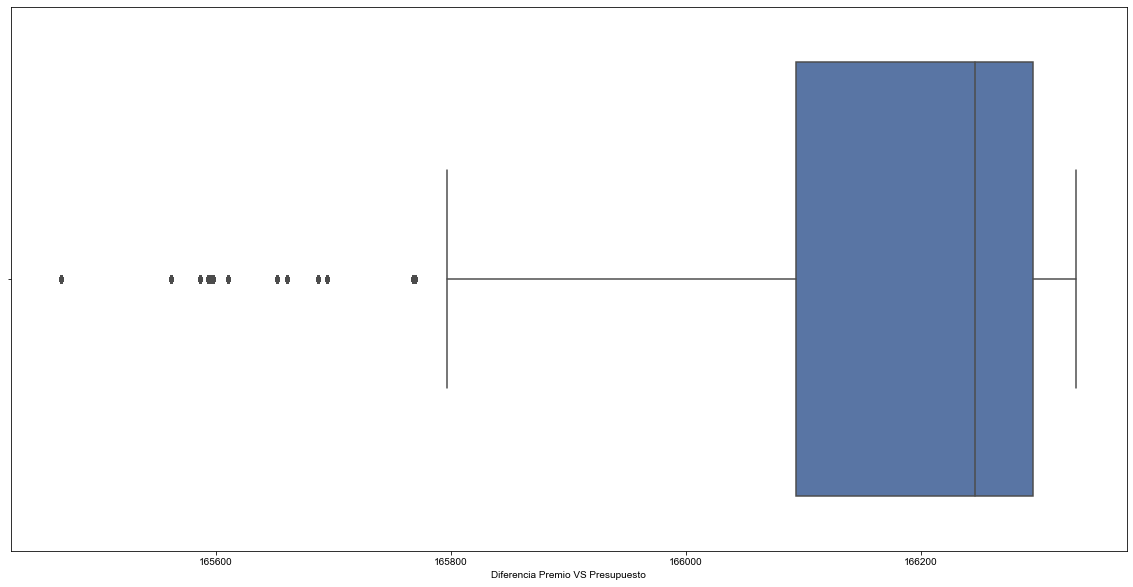

In [10]:
fig,ax = plt.subplots(figsize=(20,10)) 
sns.set_theme(style="darkgrid")
sns.boxplot(doc2["Diferencia Premio VS Presupuesto"]   ,ax= ax) 


****PREGUNTA2****

In [11]:
doc3=doc.loc[:, ["date_awards","numberOfTenderers" ]]

In [12]:
doc3.head()

,date_awards,numberOfTenderers
0,2021-05-07T14:21:51-05:00,1.0
1,2021-10-15T08:28:28-05:00,1.0
2,2021-04-23T10:25:08-05:00,1.0
3,2021-07-20T13:49:50-05:00,1.0
4,2021-08-30T08:43:16-05:00,2.0


In [13]:
doc3["date_awards"]=doc3["date_awards"].astype("str").str.split(pat= "T", expand=True)[0]

In [14]:
doc3["mes"]=pd.to_datetime(doc3["date_awards"]).dt.month

In [15]:
doc3["año"]=pd.to_datetime(doc3["date_awards"]).dt.year

In [16]:
doc3=doc3.loc[doc3["año"]==2021]

In [17]:
doc3=doc3.loc[doc3["numberOfTenderers"]==1.0]

In [18]:
doc3.head()

,date_awards,numberOfTenderers,mes,año
0,2021-05-07,1.0,5,2021
1,2021-10-15,1.0,10,2021
2,2021-04-23,1.0,4,2021
3,2021-07-20,1.0,7,2021
8,2021-11-10,1.0,11,2021


In [19]:
doc3=doc3.groupby("mes")["numberOfTenderers"].sum().reset_index()

Text(0.5, 1.0, 'Licitaciones con una sola oferta por mes')

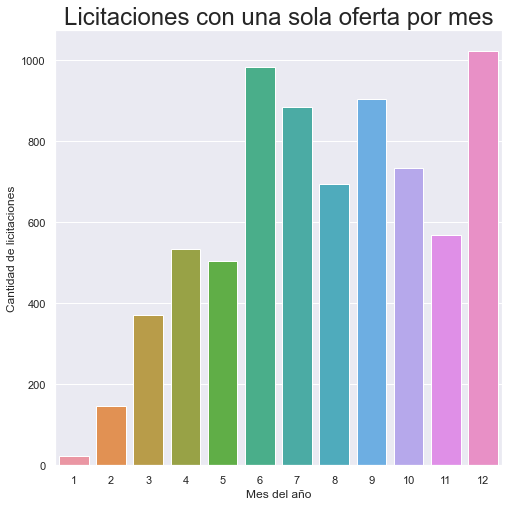

In [24]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(data = doc3, x = "mes", y="numberOfTenderers", ax = ax)
ax.set_xlabel( "Mes del año" , size = 12 ) 
  
ax.set_ylabel( "Cantidad de licitaciones" , size = 12 ) 
  
ax.set_title( "Licitaciones con una sola oferta por mes" , size = 24 ) 


In [21]:
doc3["Frecuencia Acumulada"]  = doc3["numberOfTenderers"].cumsum()
doc3

,mes,numberOfTenderers,Frecuencia Acumulada
0,1,23.0,23.0
1,2,147.0,170.0
2,3,372.0,542.0
3,4,533.0,1075.0
4,5,505.0,1580.0
5,6,983.0,2563.0
6,7,884.0,3447.0
7,8,693.0,4140.0
8,9,905.0,5045.0
9,10,733.0,5778.0


Text(0.5, 1.0, 'Frecuencia acumulada de los Niveles de corrupción')

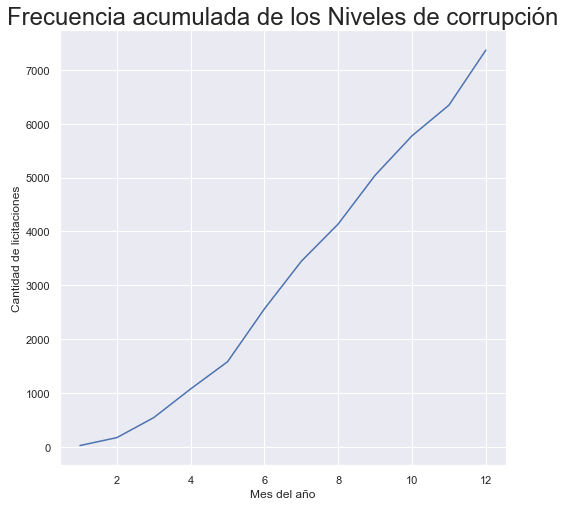

In [22]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data = doc3, x = "mes", y="Frecuencia Acumulada", ax = ax)
ax.set_xlabel( "Mes del año" , size = 12 ) 
  
ax.set_ylabel( "Cantidad de licitaciones" , size = 12 ) 
  
ax.set_title( "Frecuencia acumulada de los Niveles de corrupción" , size = 24 ) 
